# 일원분산(ANOVA)분석

In [1]:
import pandas as pd

In [13]:
# 데이터 불러오기 및 확인
df = pd.read_csv("datas2/지점별_일별판매량.csv", encoding='euc-kr')
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   일자      30 non-null     int64
 1   지점A     30 non-null     int64
 2   지점B     30 non-null     int64
 3   지점C     30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [14]:
# 데이터 분할 (결측이 포함되어 있을 수 있으므로 dropna를 사용)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values

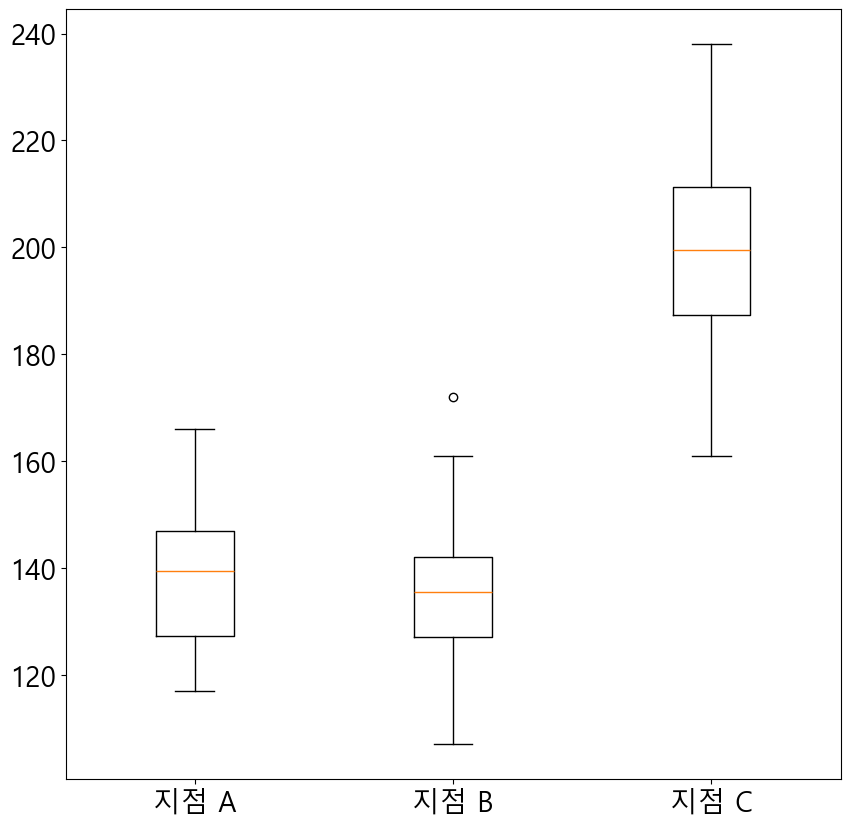

In [15]:
# 박스플롯으로 시각화
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 10)
plt.boxplot([A, B, C])
plt.xticks([1, 2, 3], ['지점 A', '지점 B', '지점 C'])
plt.show()

In [16]:
# 정규성 검정: 세 변수 모두 정규 분포를 띔을 확인
from scipy.stats import *
print(kstest(A, 'norm'))
print(kstest(B, 'norm'))
print(kstest(C, 'norm'))

KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.int64(117), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.int64(107), statistic_sign=np.int8(-1))
KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.int64(161), statistic_sign=np.int8(-1))


In [17]:
# 일원분산분석 수행: p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재
print(f_oneway(A, B, C))

F_onewayResult(statistic=np.float64(178.43825416847133), pvalue=np.float64(1.6337420285664832e-31))


In [25]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)
Data = A.tolist() + B.tolist() + C.tolist()

print(pairwise_tukeyhsd(Data, Group))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -1.4 0.9297 -10.5741  7.7741  False
     A      C  62.2333    0.0  53.0592 71.4075   True
     B      C  63.6333    0.0  54.4592 72.8075   True
-----------------------------------------------------
